In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df= pd.read_csv('sales_data_with_discounts.csv')

In [3]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
#Identify numerical columns in the dataset.
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [5]:
data_types = df.dtypes

# Identify numerical columns
numerical_columns = data_types[data_types != 'object']

#print("Numerical columns: \n", numerical_columns)
numerical_columns

Volume                 int64
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [6]:
numerical_cols=df.select_dtypes(include=np.number)
numerical_cols

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [7]:
#Calculate the mean, median, mode, and standard deviation for these columns.

In [8]:
df.mean()

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [9]:
df.median()

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [10]:
df.mode()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,F01,C,3.0,FMCG,Jeera,Babaji Cream,400.0,24300.0,5.007822,69.177942,326.974801
1,02-04-2021,NaN,F02,NaN,NaN,Lifestyle,NaN,Babaji Oil,450.0,NaN,5.055218,73.025199,330.822058
2,03-04-2021,NaN,F03,NaN,NaN,Mobiles,NaN,Babaji Shampoo,500.0,NaN,5.059801,93.649161,466.350839
3,04-04-2021,NaN,F04,NaN,NaN,NaN,NaN,Gear BB Cream,1300.0,NaN,5.072124,94.682735,485.317265
4,05-04-2021,NaN,F05,NaN,NaN,NaN,NaN,Gear Cream,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


In [11]:
df.std()

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

In [12]:
#	Provide a brief interpretation of these statistics

In [13]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [14]:
df.describe(include=object)

,Date,Day,SKU,City,BU,Brand,Model
count,450,450,450,450,450,450,450
unique,15,7,30,1,3,9,30
top,07-04-2021,Thursday,M02,C,Lifestyle,Jeera,Vedic Oil
freq,30,90,15,450,150,90,15


In [15]:
##	Plot histograms for each numerical column.

In [16]:
plt.rcParams['figure.figsize'] = (20,15)
plt.rcParams['figure.dpi'] = 300

In [17]:
numerical_cols.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


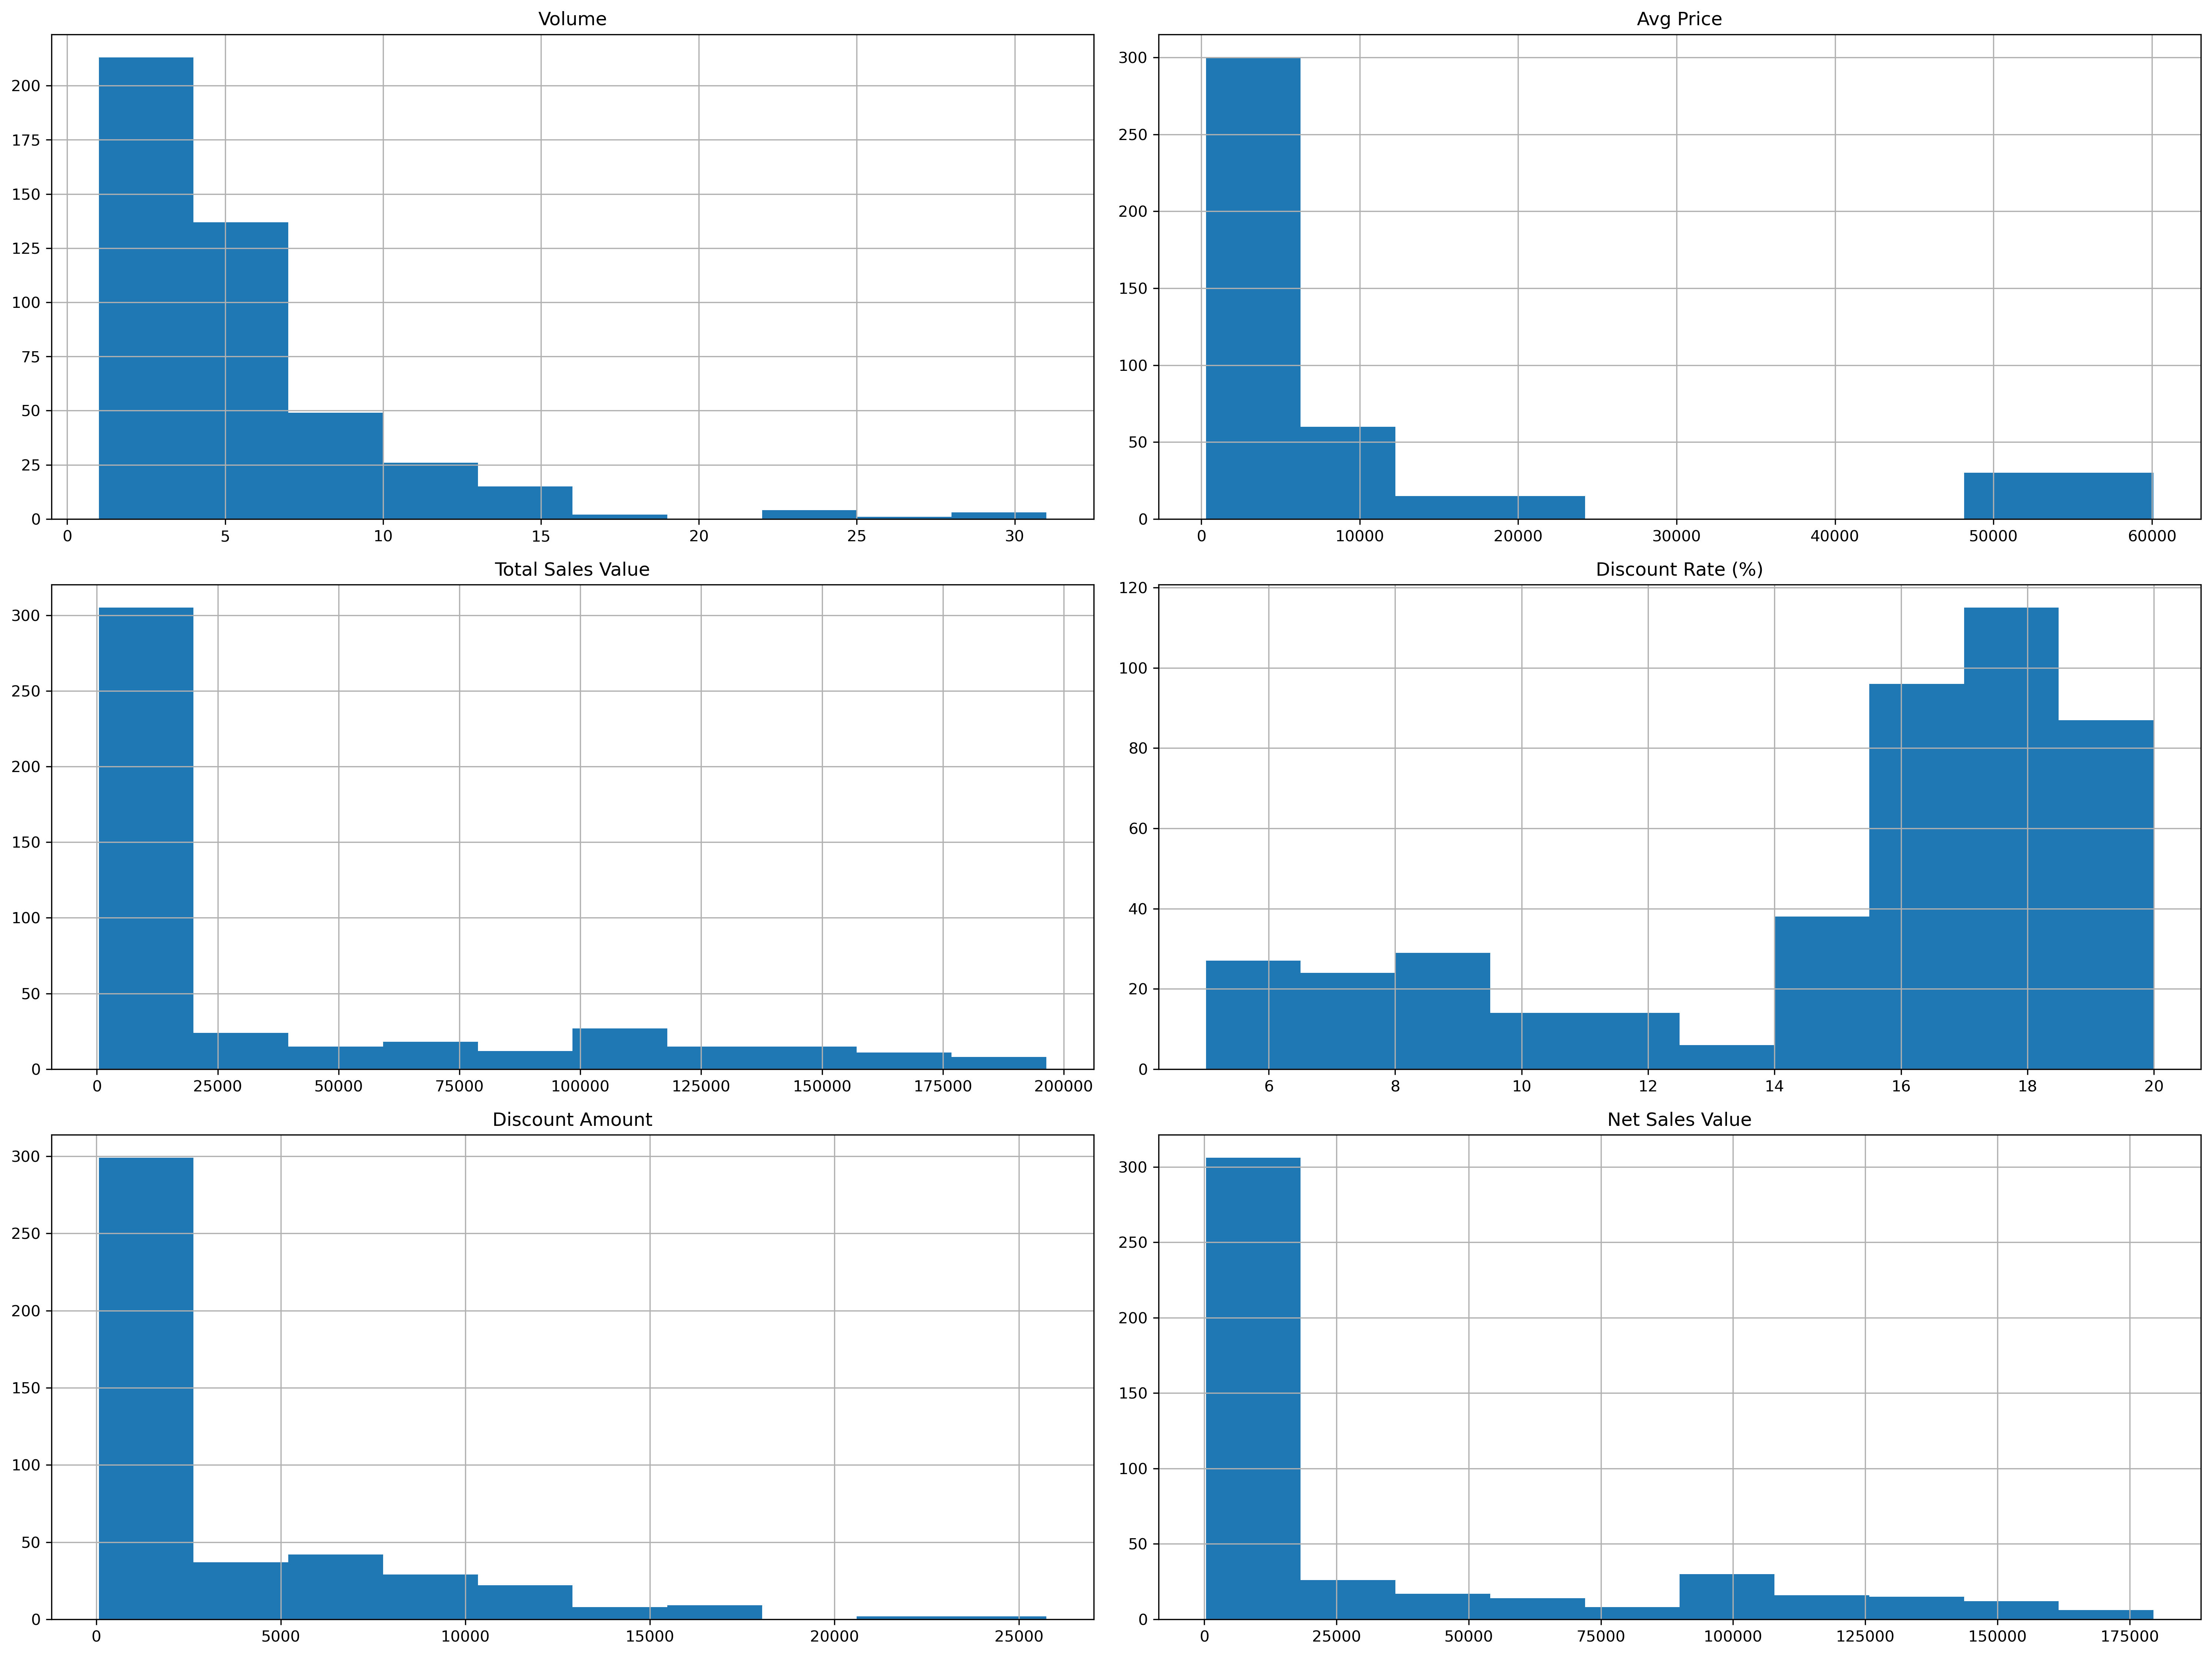

In [18]:
df.hist()
plt.tight_layout()

# Boxplot

In [19]:
"""	Create boxplots for numerical variables to identify outliers 
and the interquartile range"""

'\tCreate boxplots for numerical variables to identify outliers \nand the interquartile range'

In [20]:
numerical_cols.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


<function matplotlib.pyplot.show(close=None, block=None)>

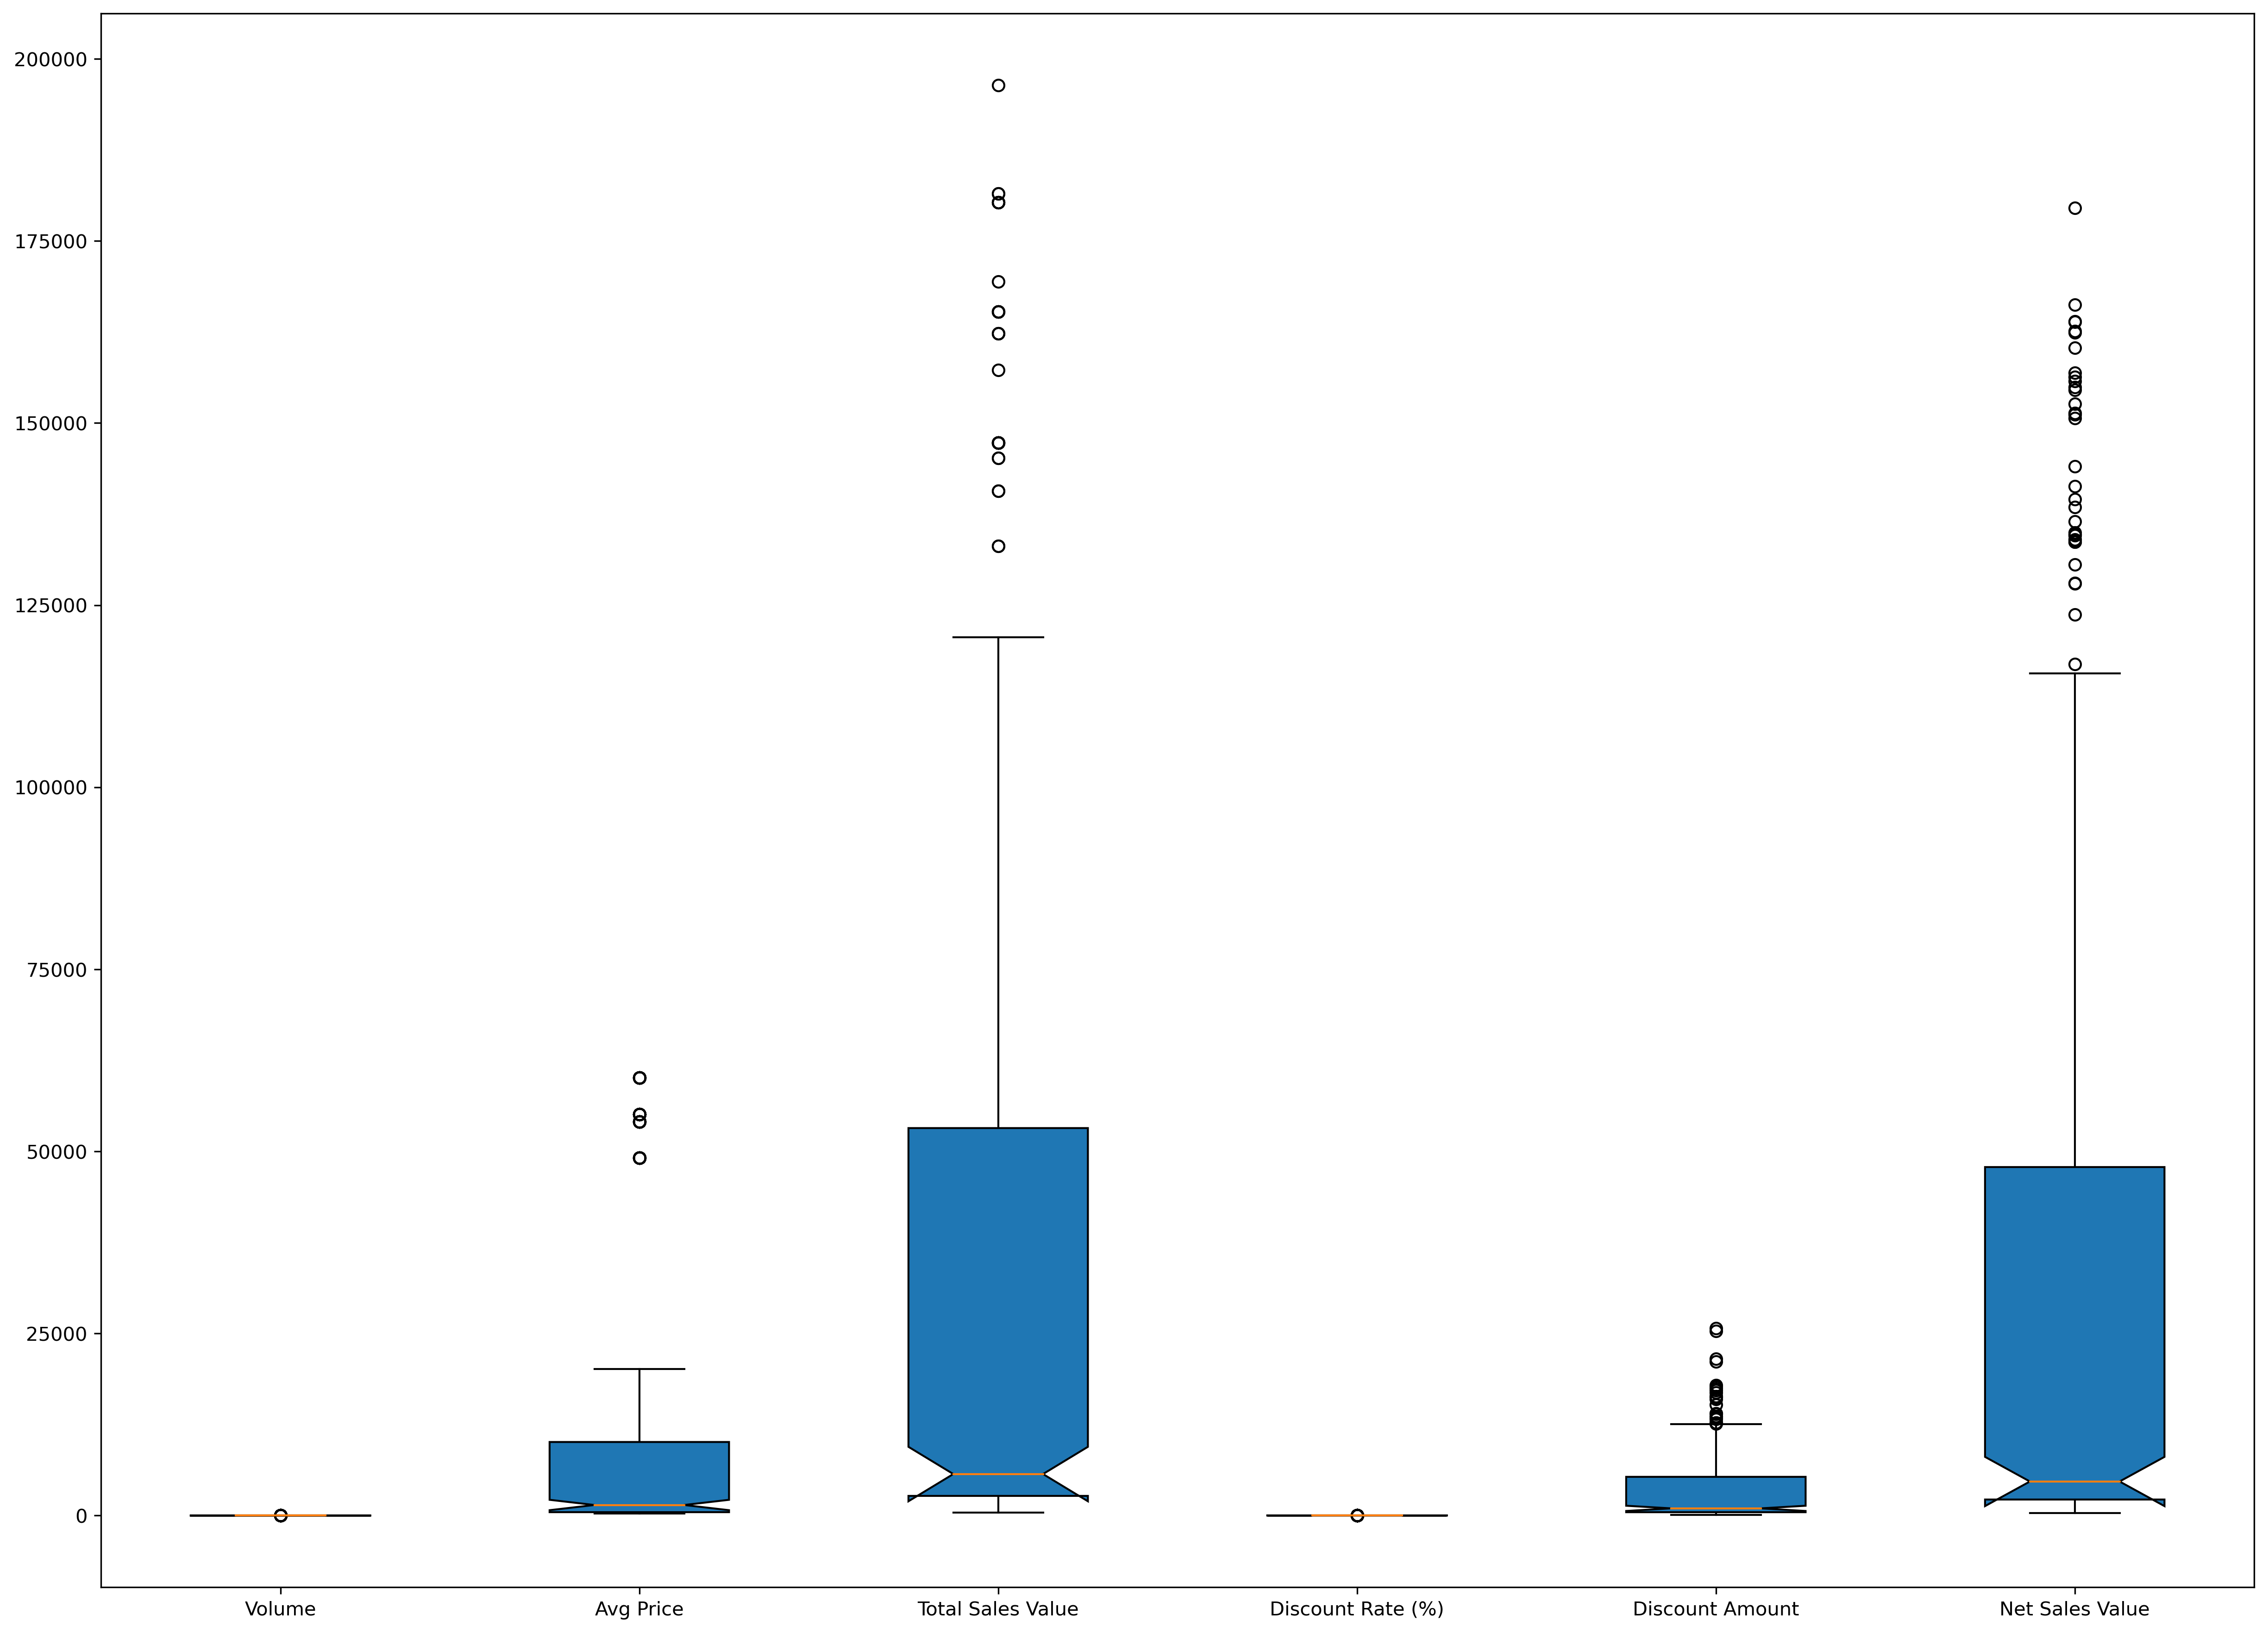

<Figure size 4500x1800 with 0 Axes>

In [21]:
plt.boxplot(x=numerical_cols, patch_artist=True, labels=numerical_cols.columns, autorange= True, notch=True)
plt.figure(figsize=(15, 6))
plt.tight_layout()
plt.show

In [22]:
numerical_cols.quantile(0.25)

Volume                  3.000000
Avg Price             465.000000
Total Sales Value    2700.000000
Discount Rate (%)      13.965063
Discount Amount       460.459304
Net Sales Value      2202.208645
Name: 0.25, dtype: float64

In [23]:
numerical_cols.quantile(0.50)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
Name: 0.5, dtype: float64

In [24]:
numerical_cols.quantile(0.75)

Volume                   6.000000
Avg Price            10100.000000
Total Sales Value    53200.000000
Discount Rate (%)       18.114718
Discount Amount       5316.495427
Net Sales Value      47847.912852
Name: 0.75, dtype: float64

# Bar Chart Analysis for Categorical Column

In [25]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [26]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [27]:
df.dtypes=='object'

Date                  True
Day                   True
SKU                   True
City                  True
Volume               False
BU                    True
Brand                 True
Model                 True
Avg Price            False
Total Sales Value    False
Discount Rate (%)    False
Discount Amount      False
Net Sales Value      False
dtype: bool

In [28]:
data_types = df.dtypes

# Identify categorical columns
categorical_columns = data_types[data_types == 'object']
categorical_columns

Date     object
Day      object
SKU      object
City     object
BU       object
Brand    object
Model    object
dtype: object

In [29]:
categorical_cols= df.select_dtypes(include=np.object_)

In [30]:
categorical_cols

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


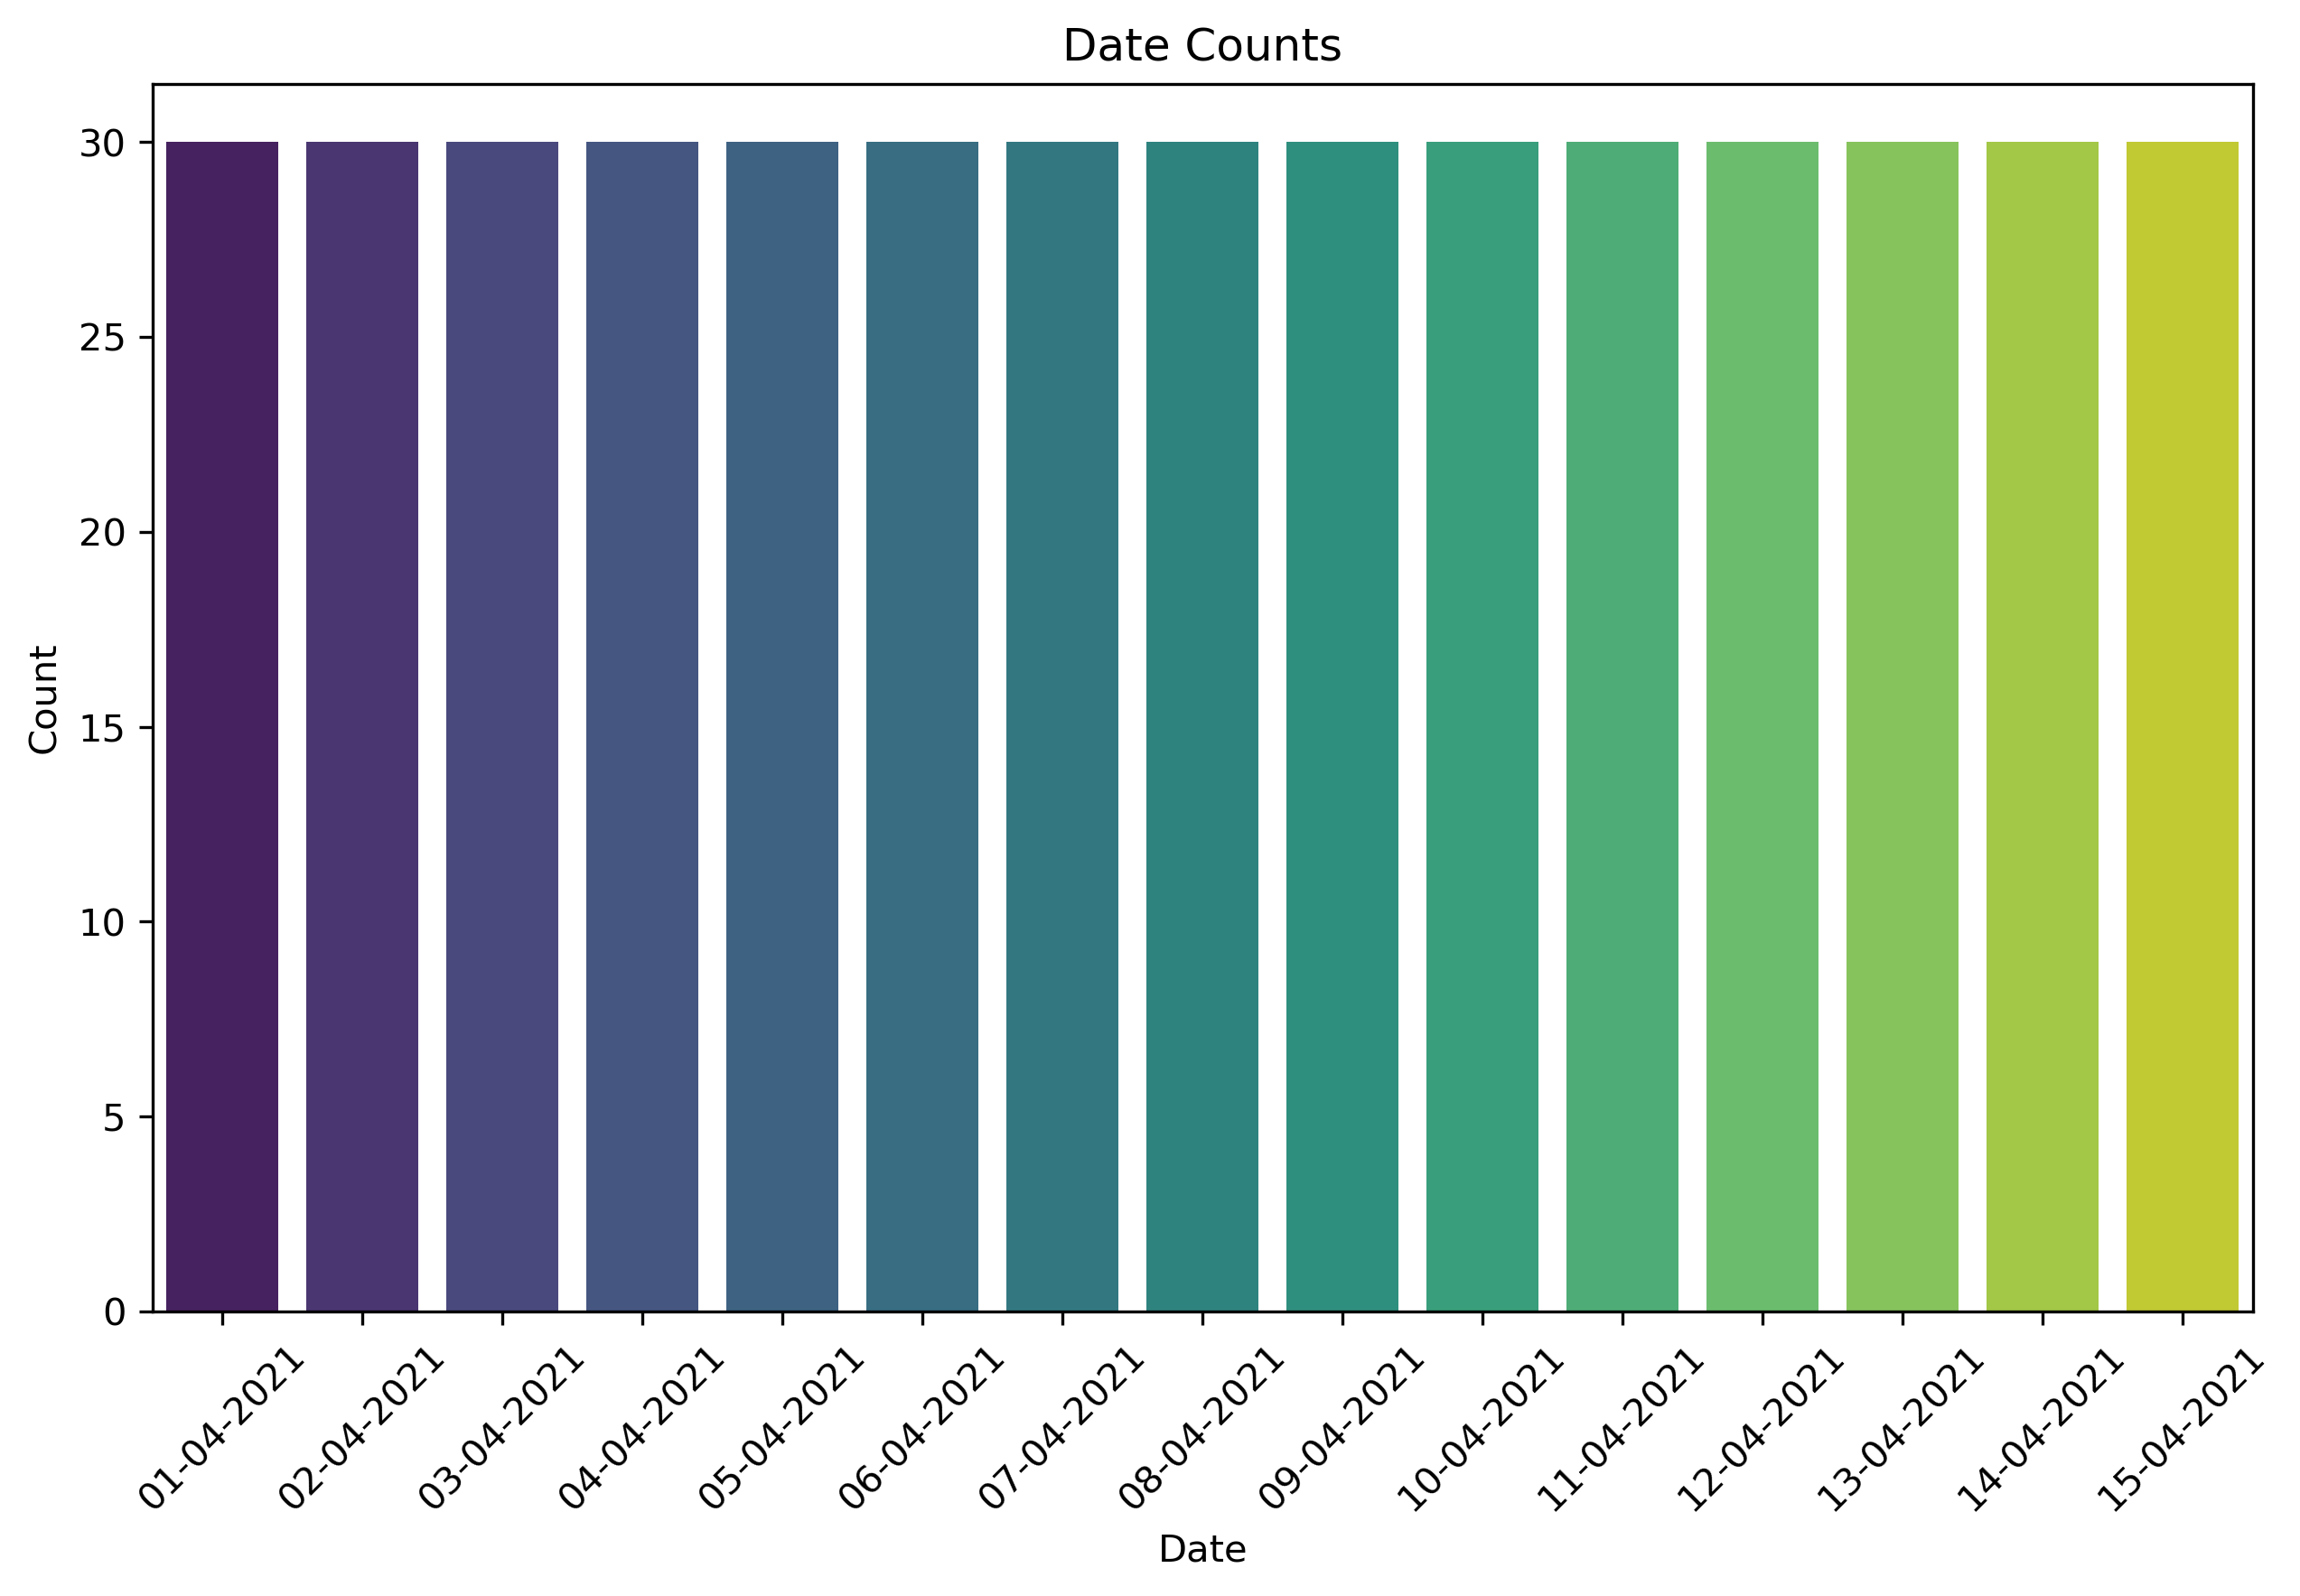

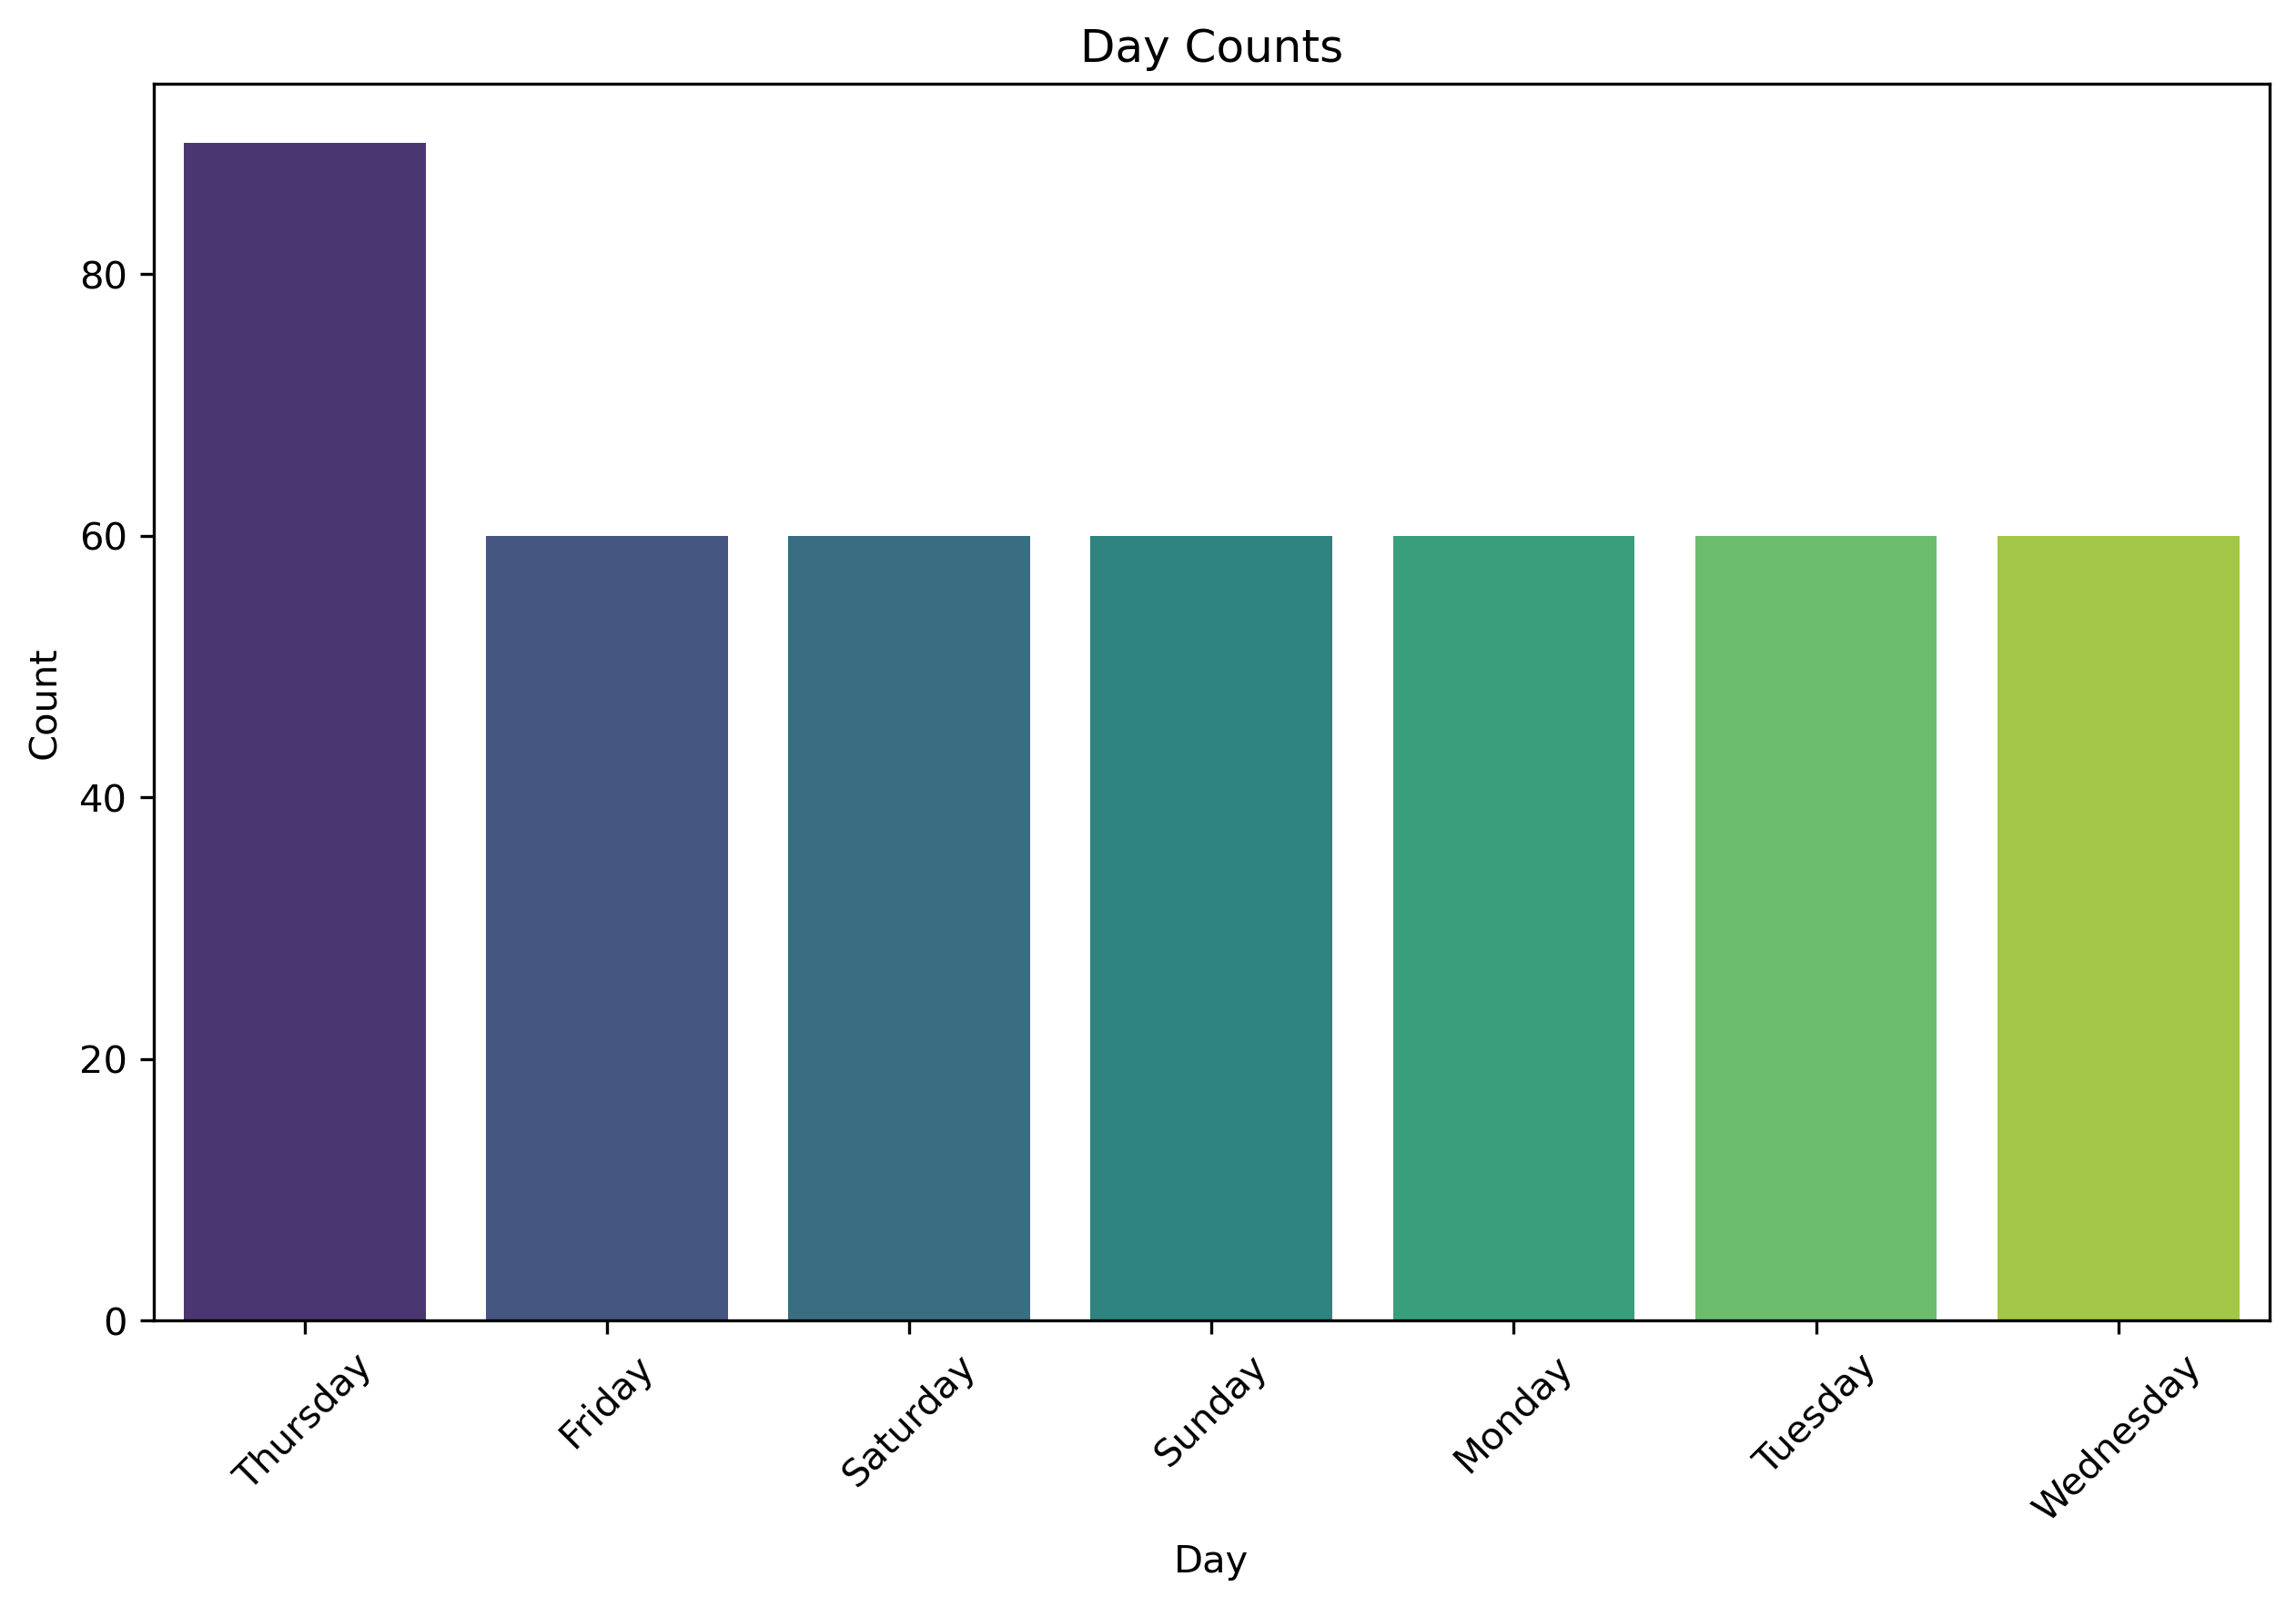

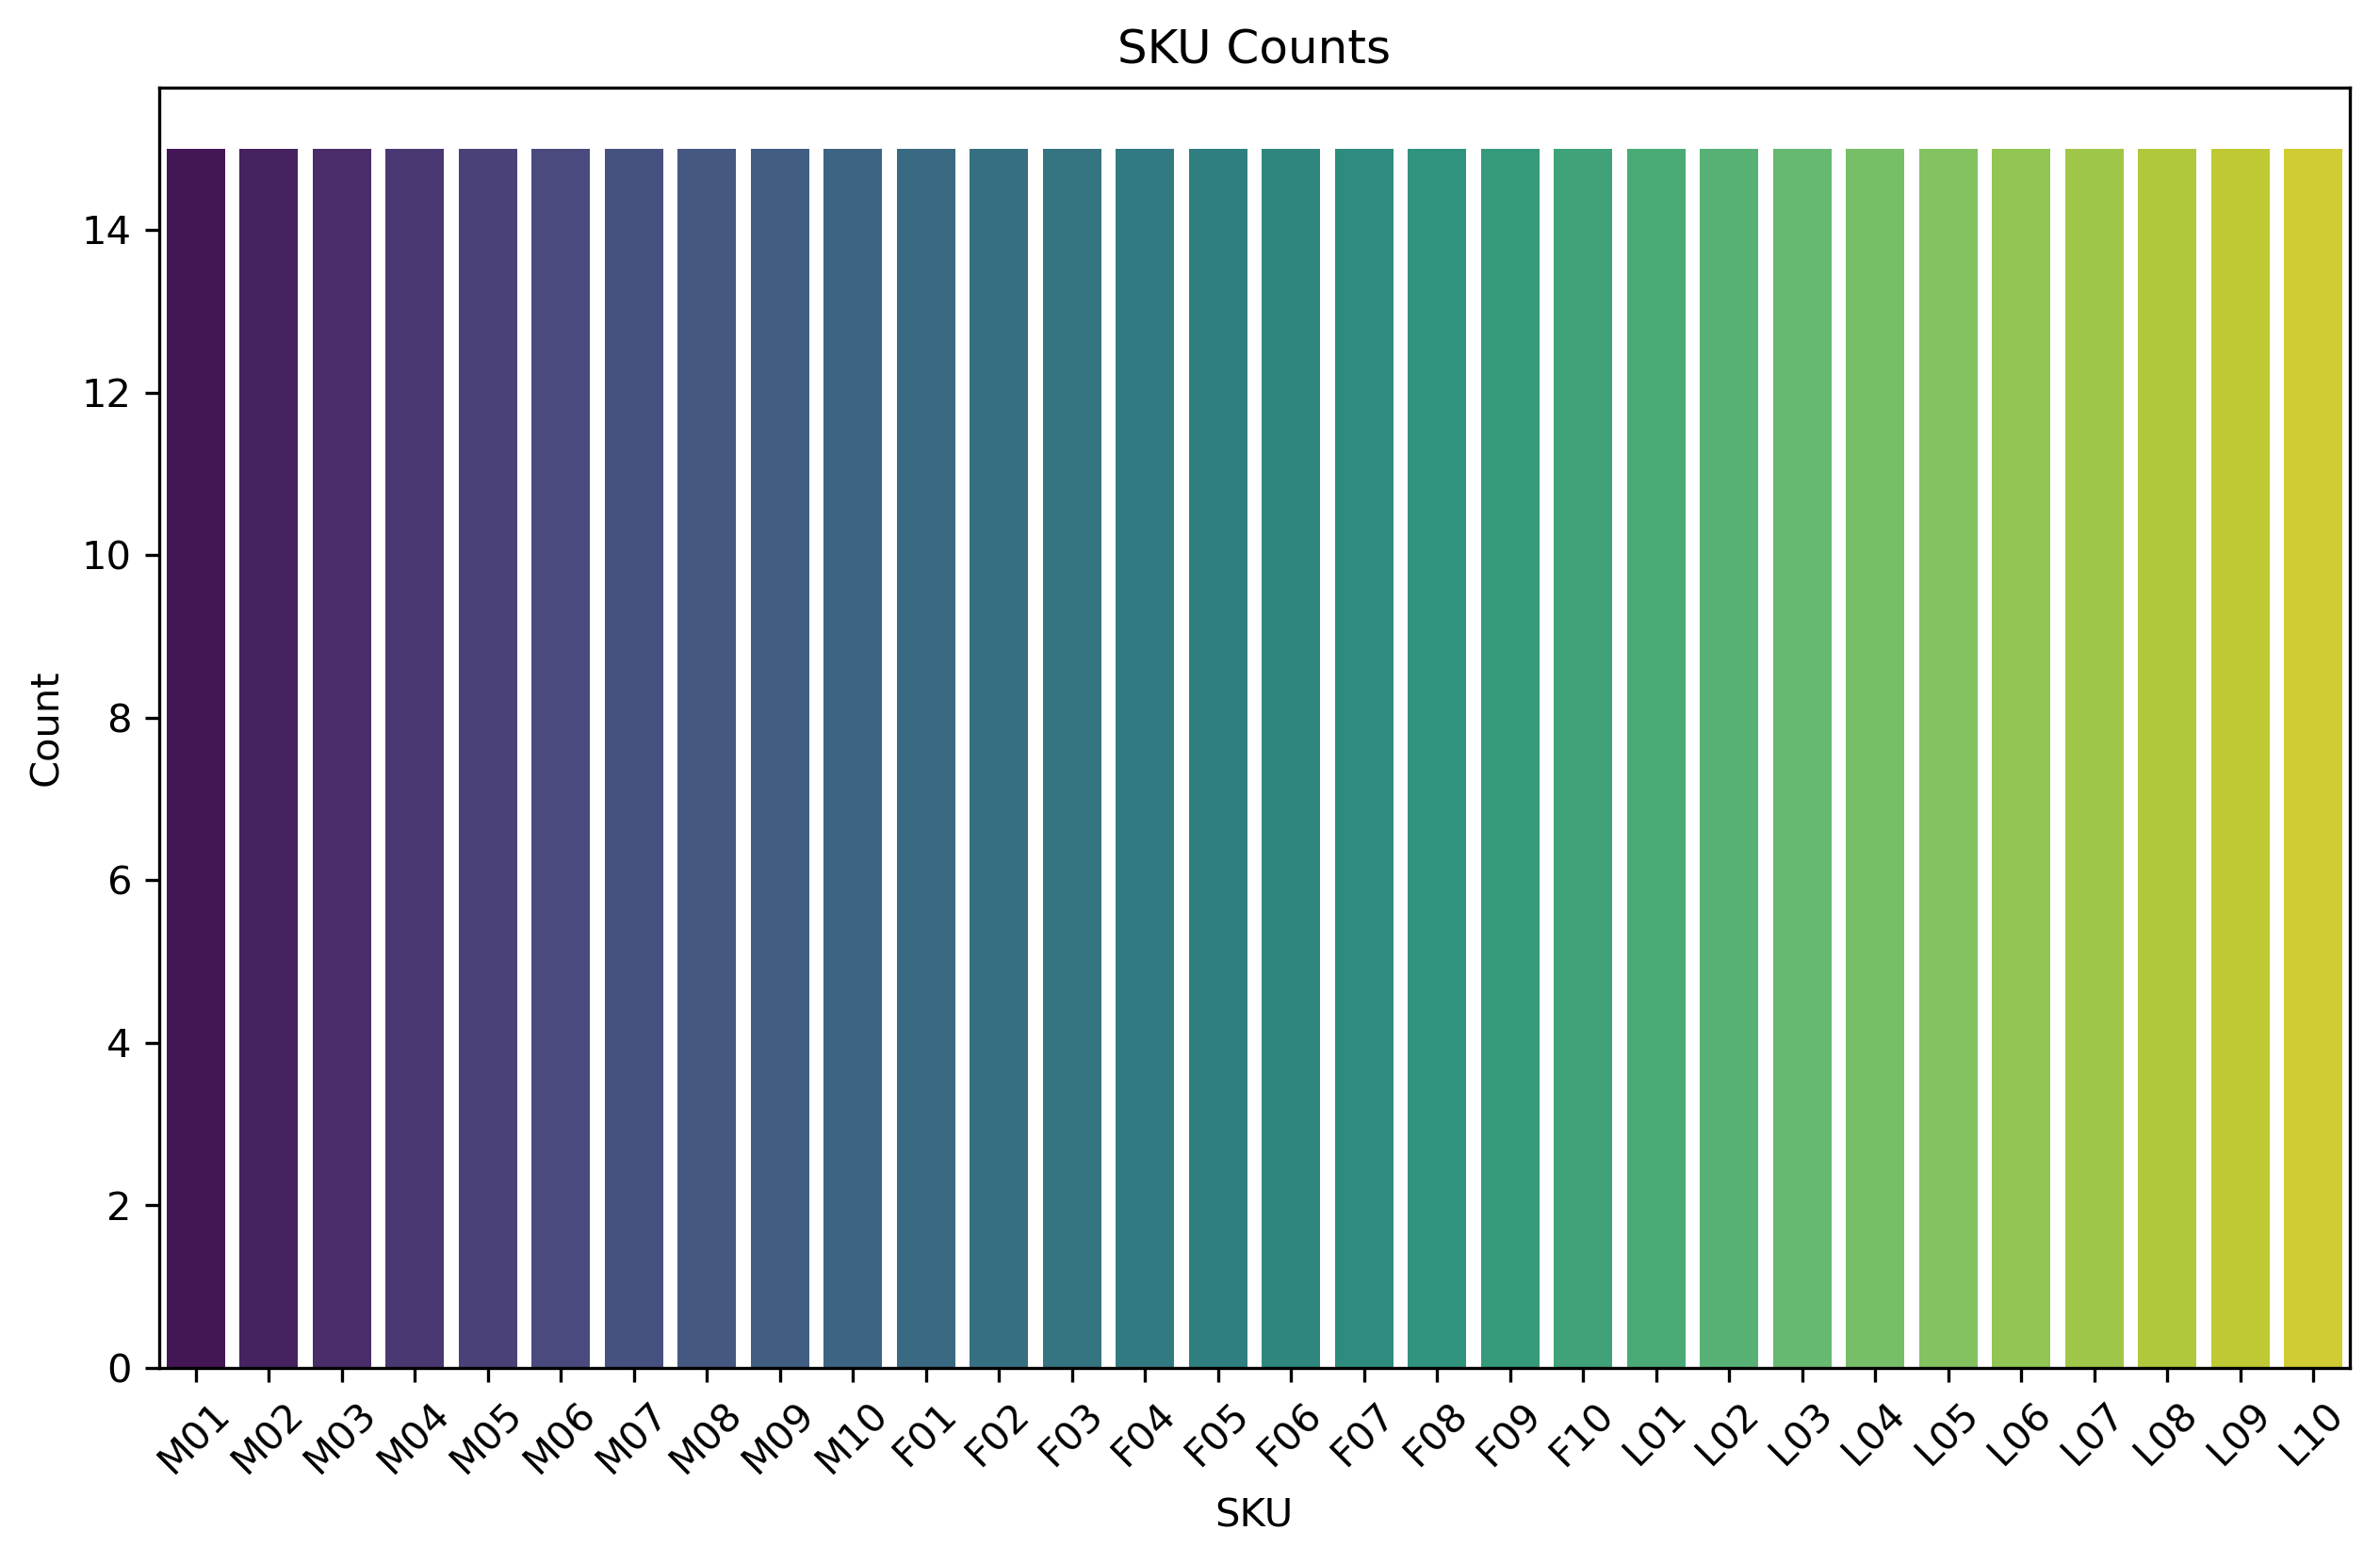

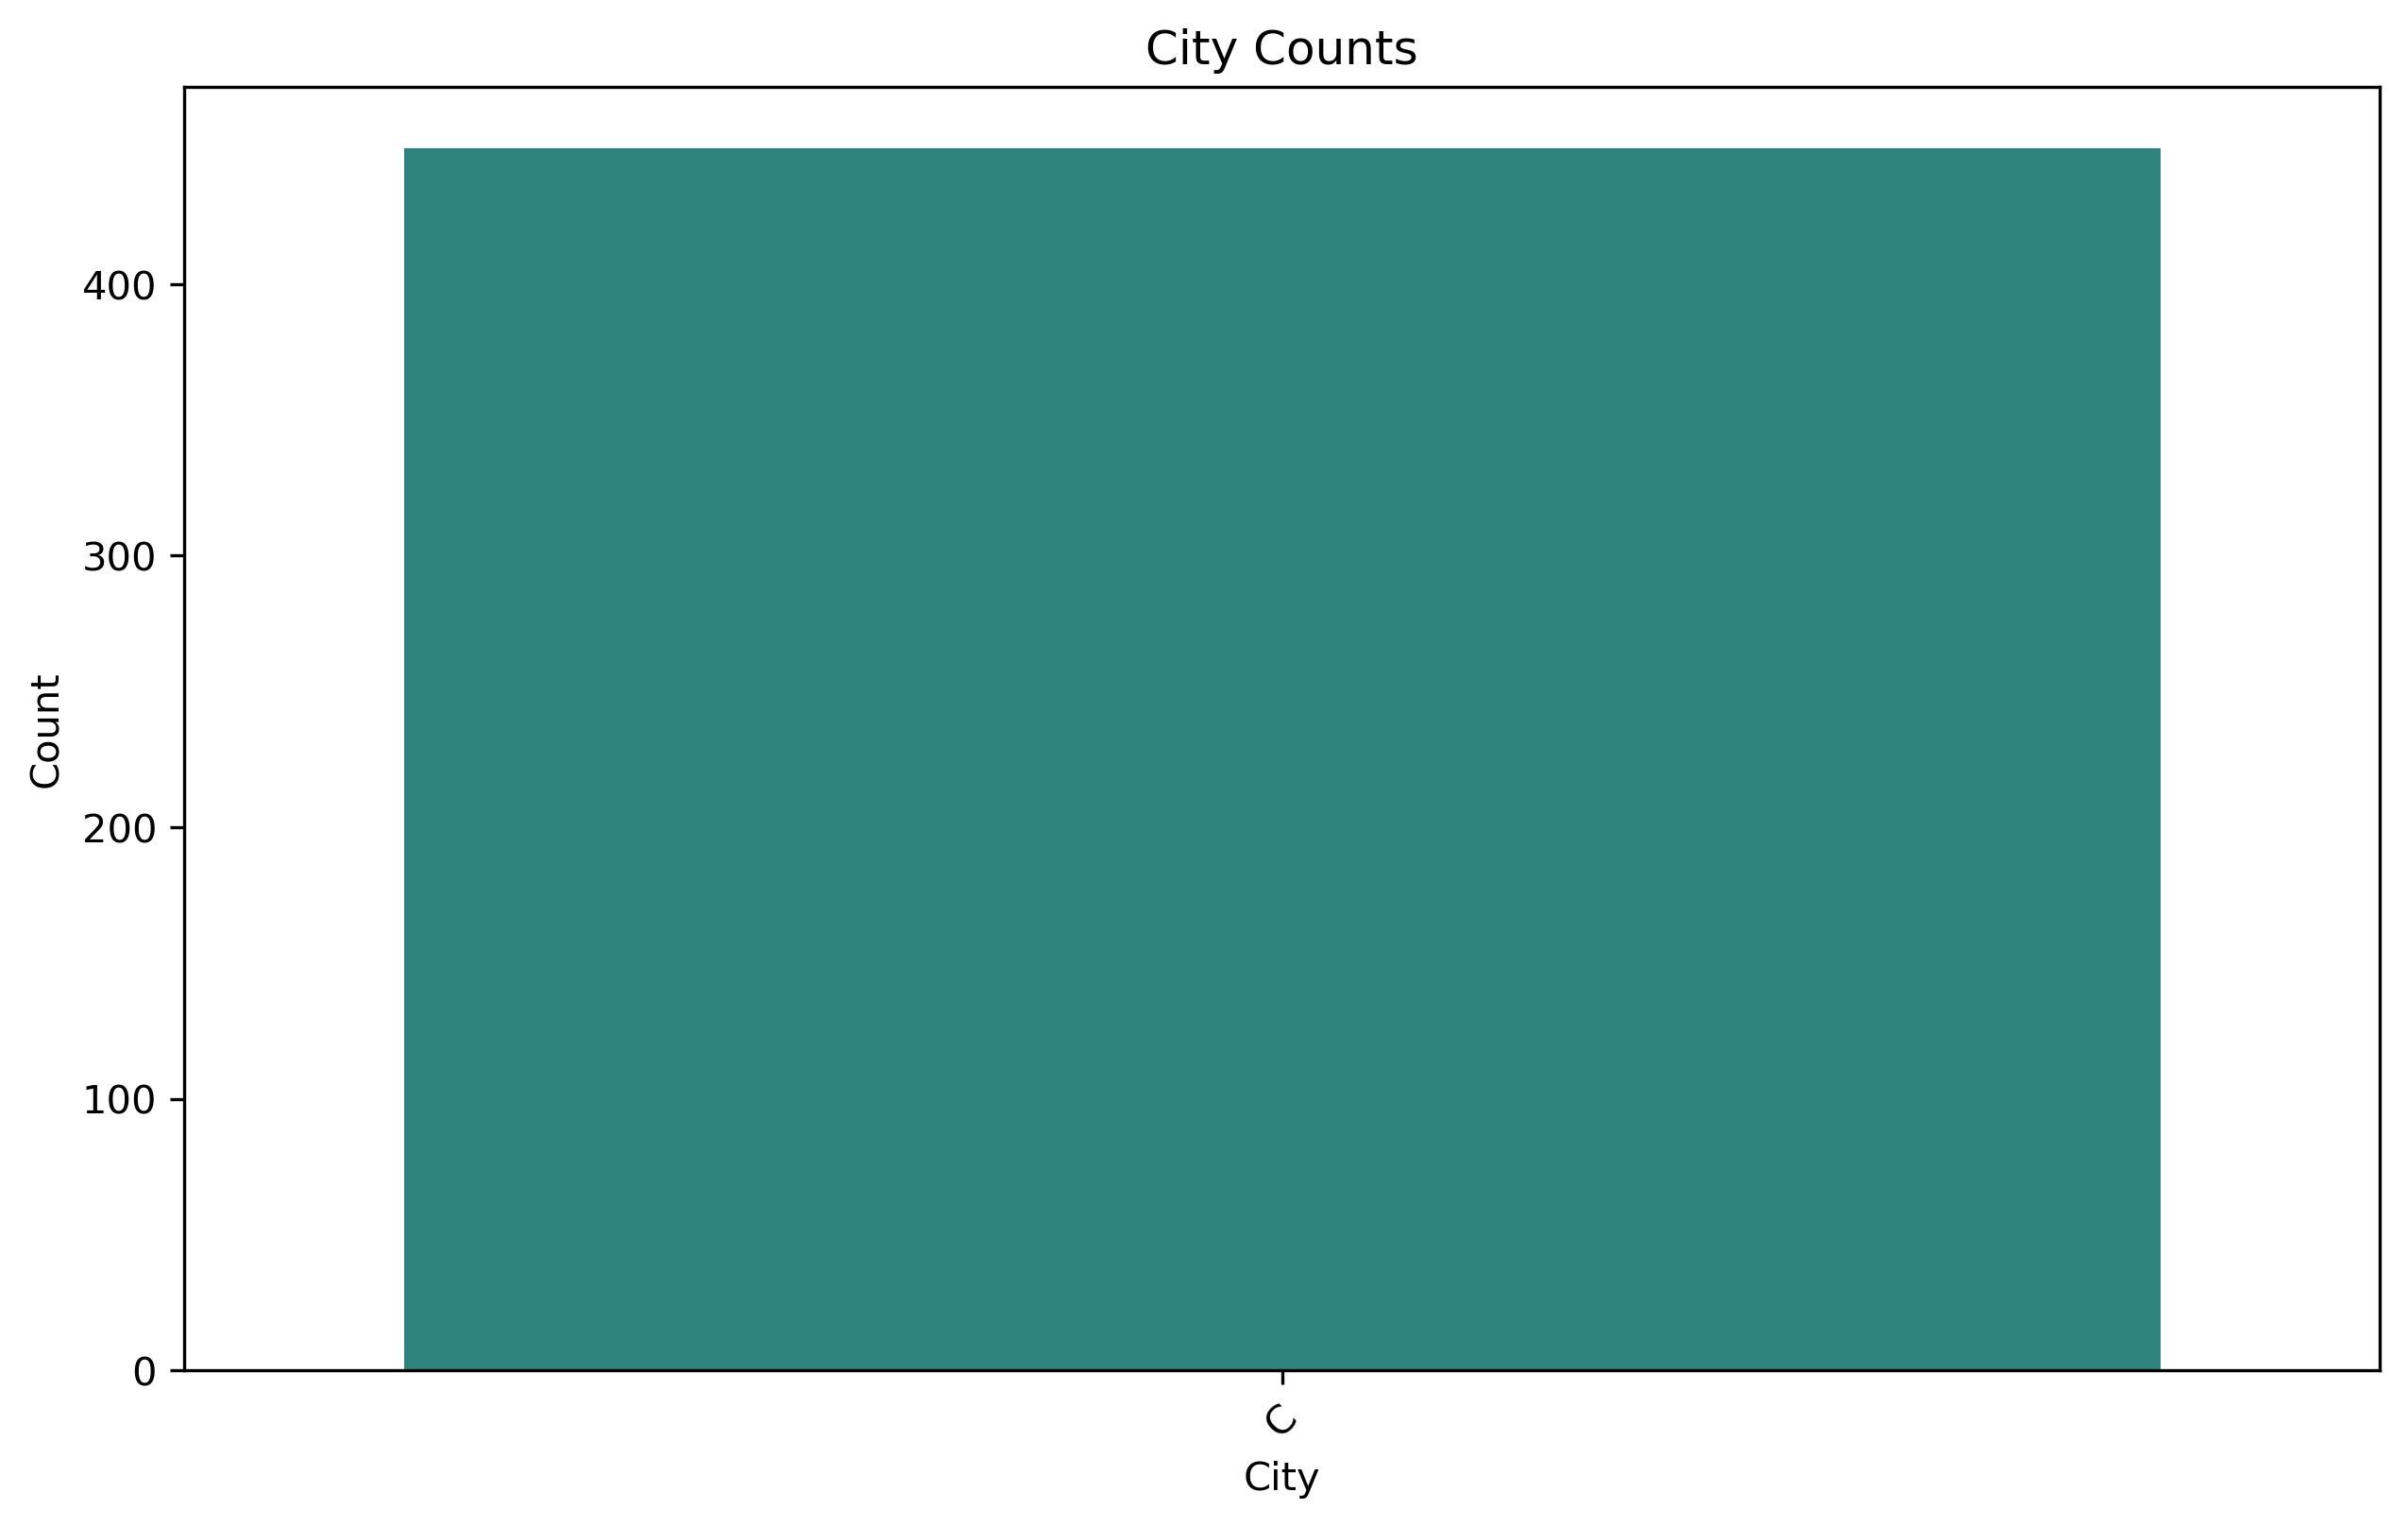

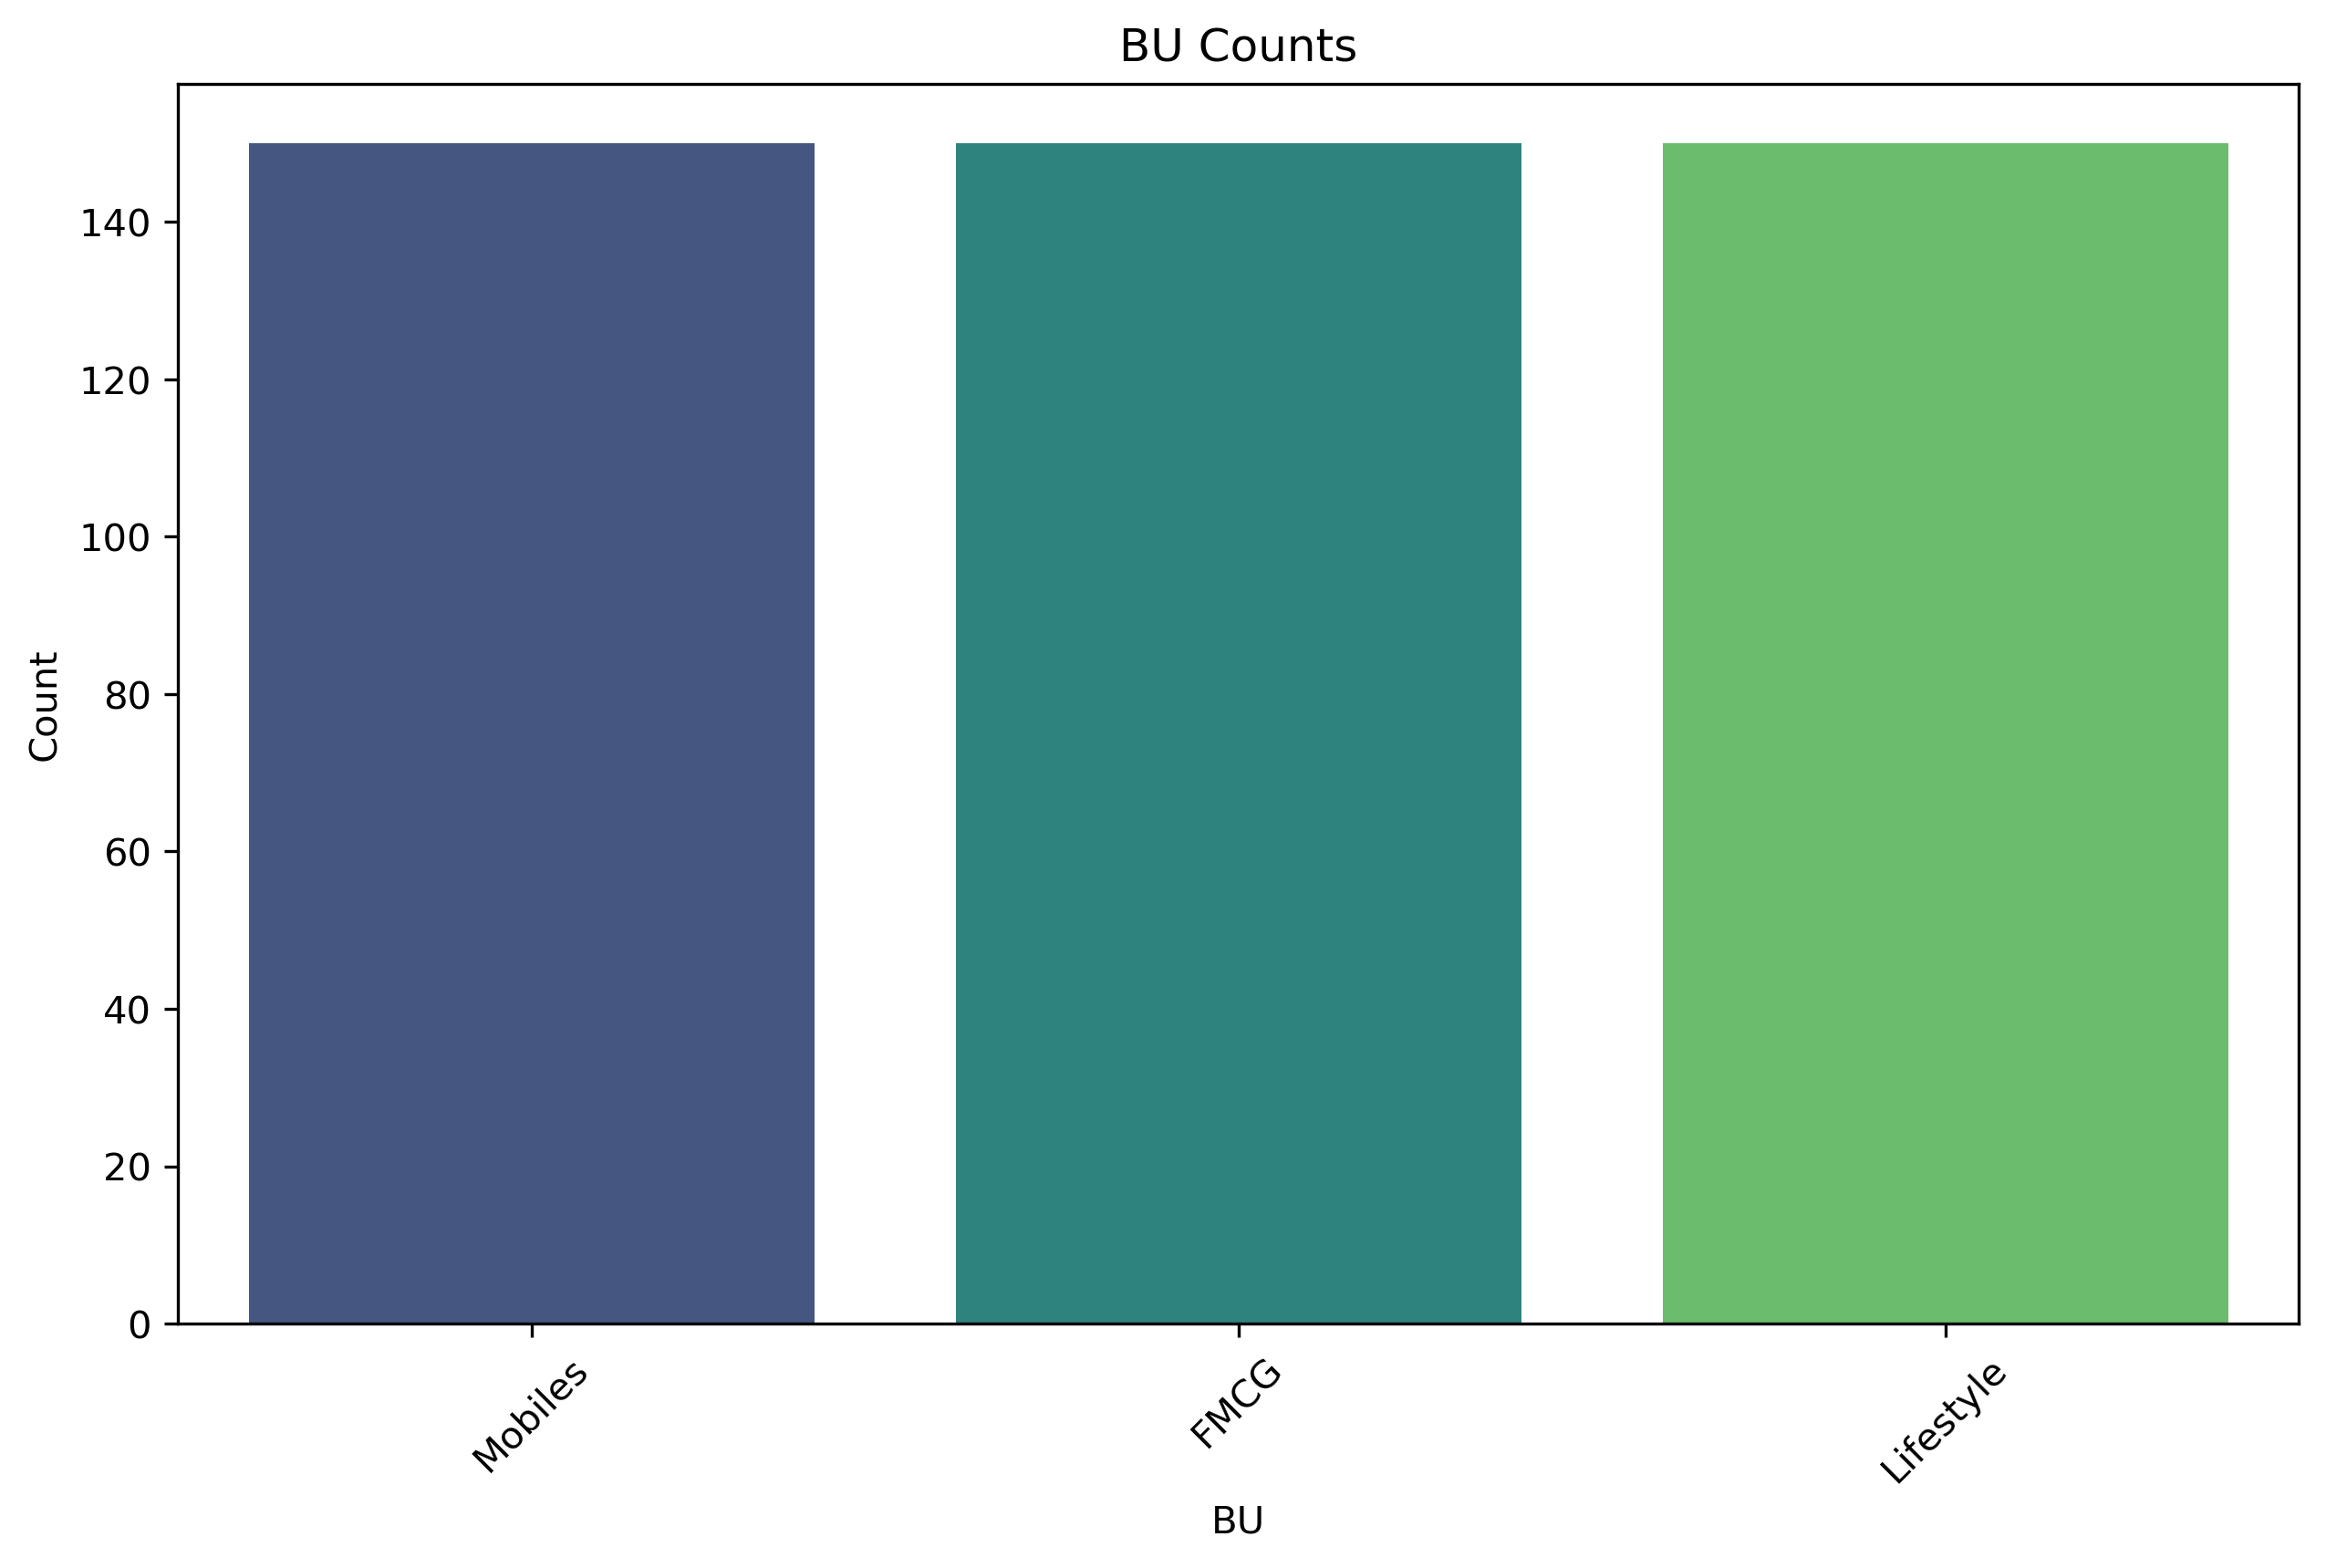

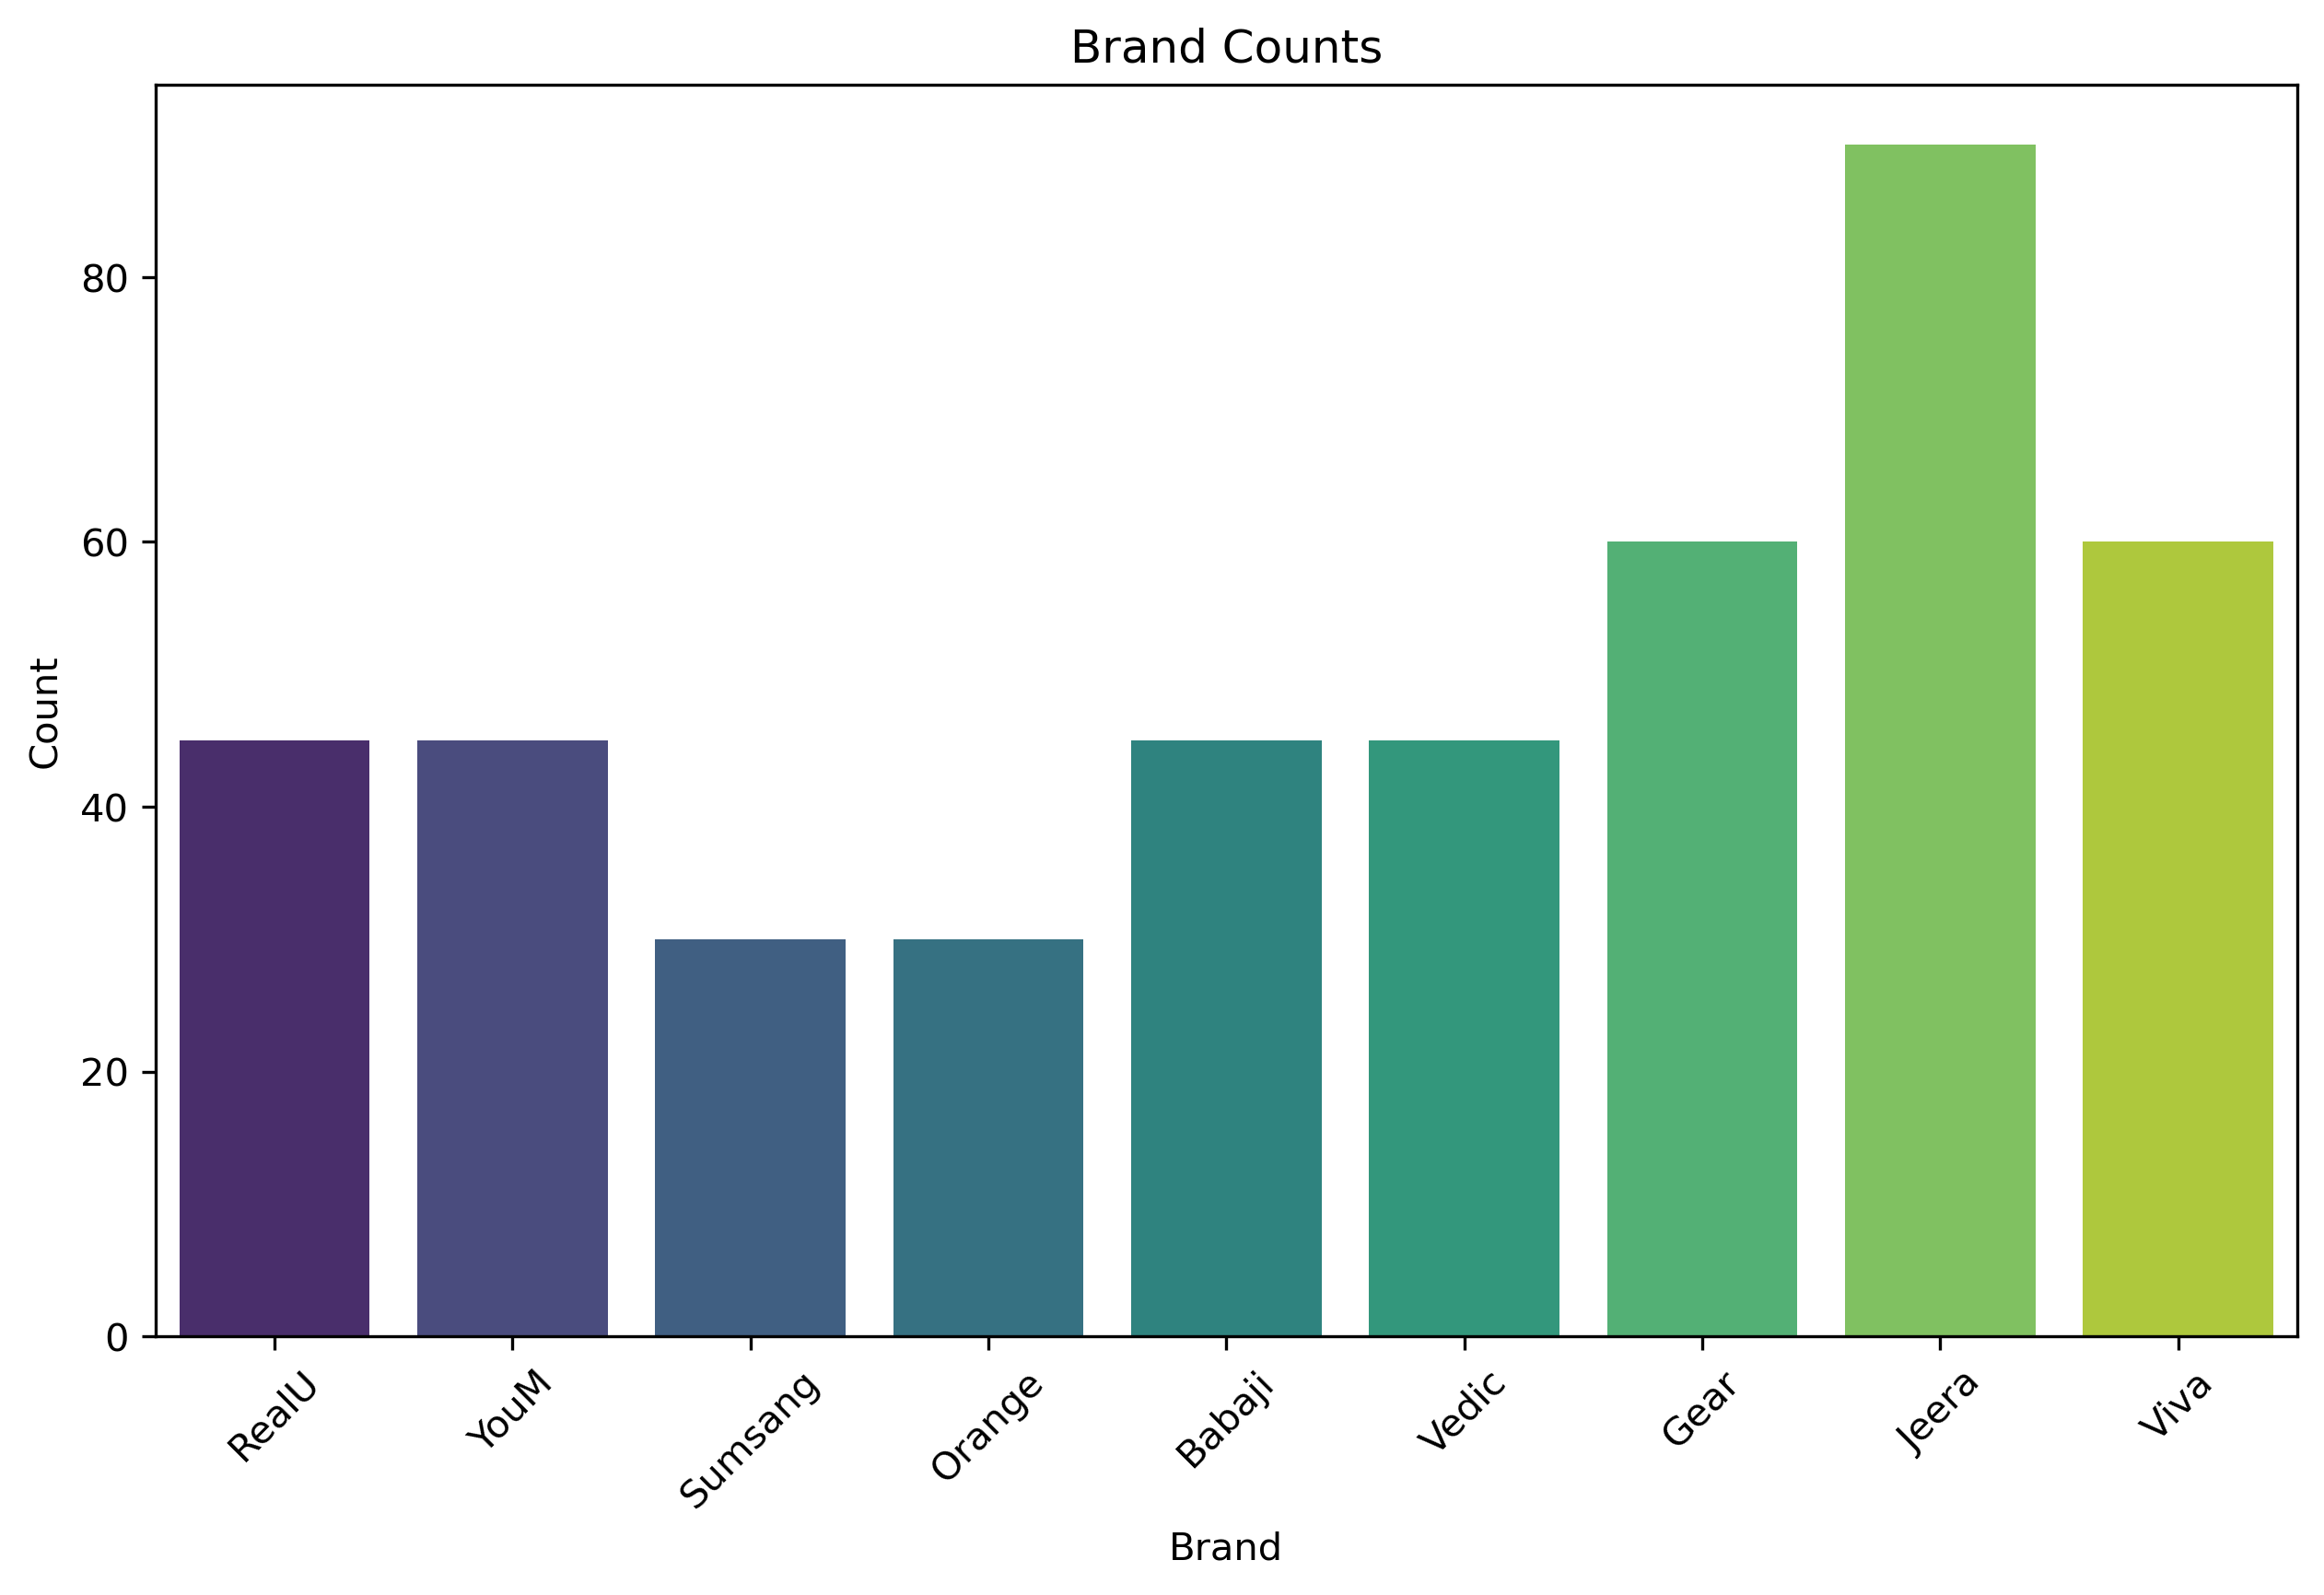

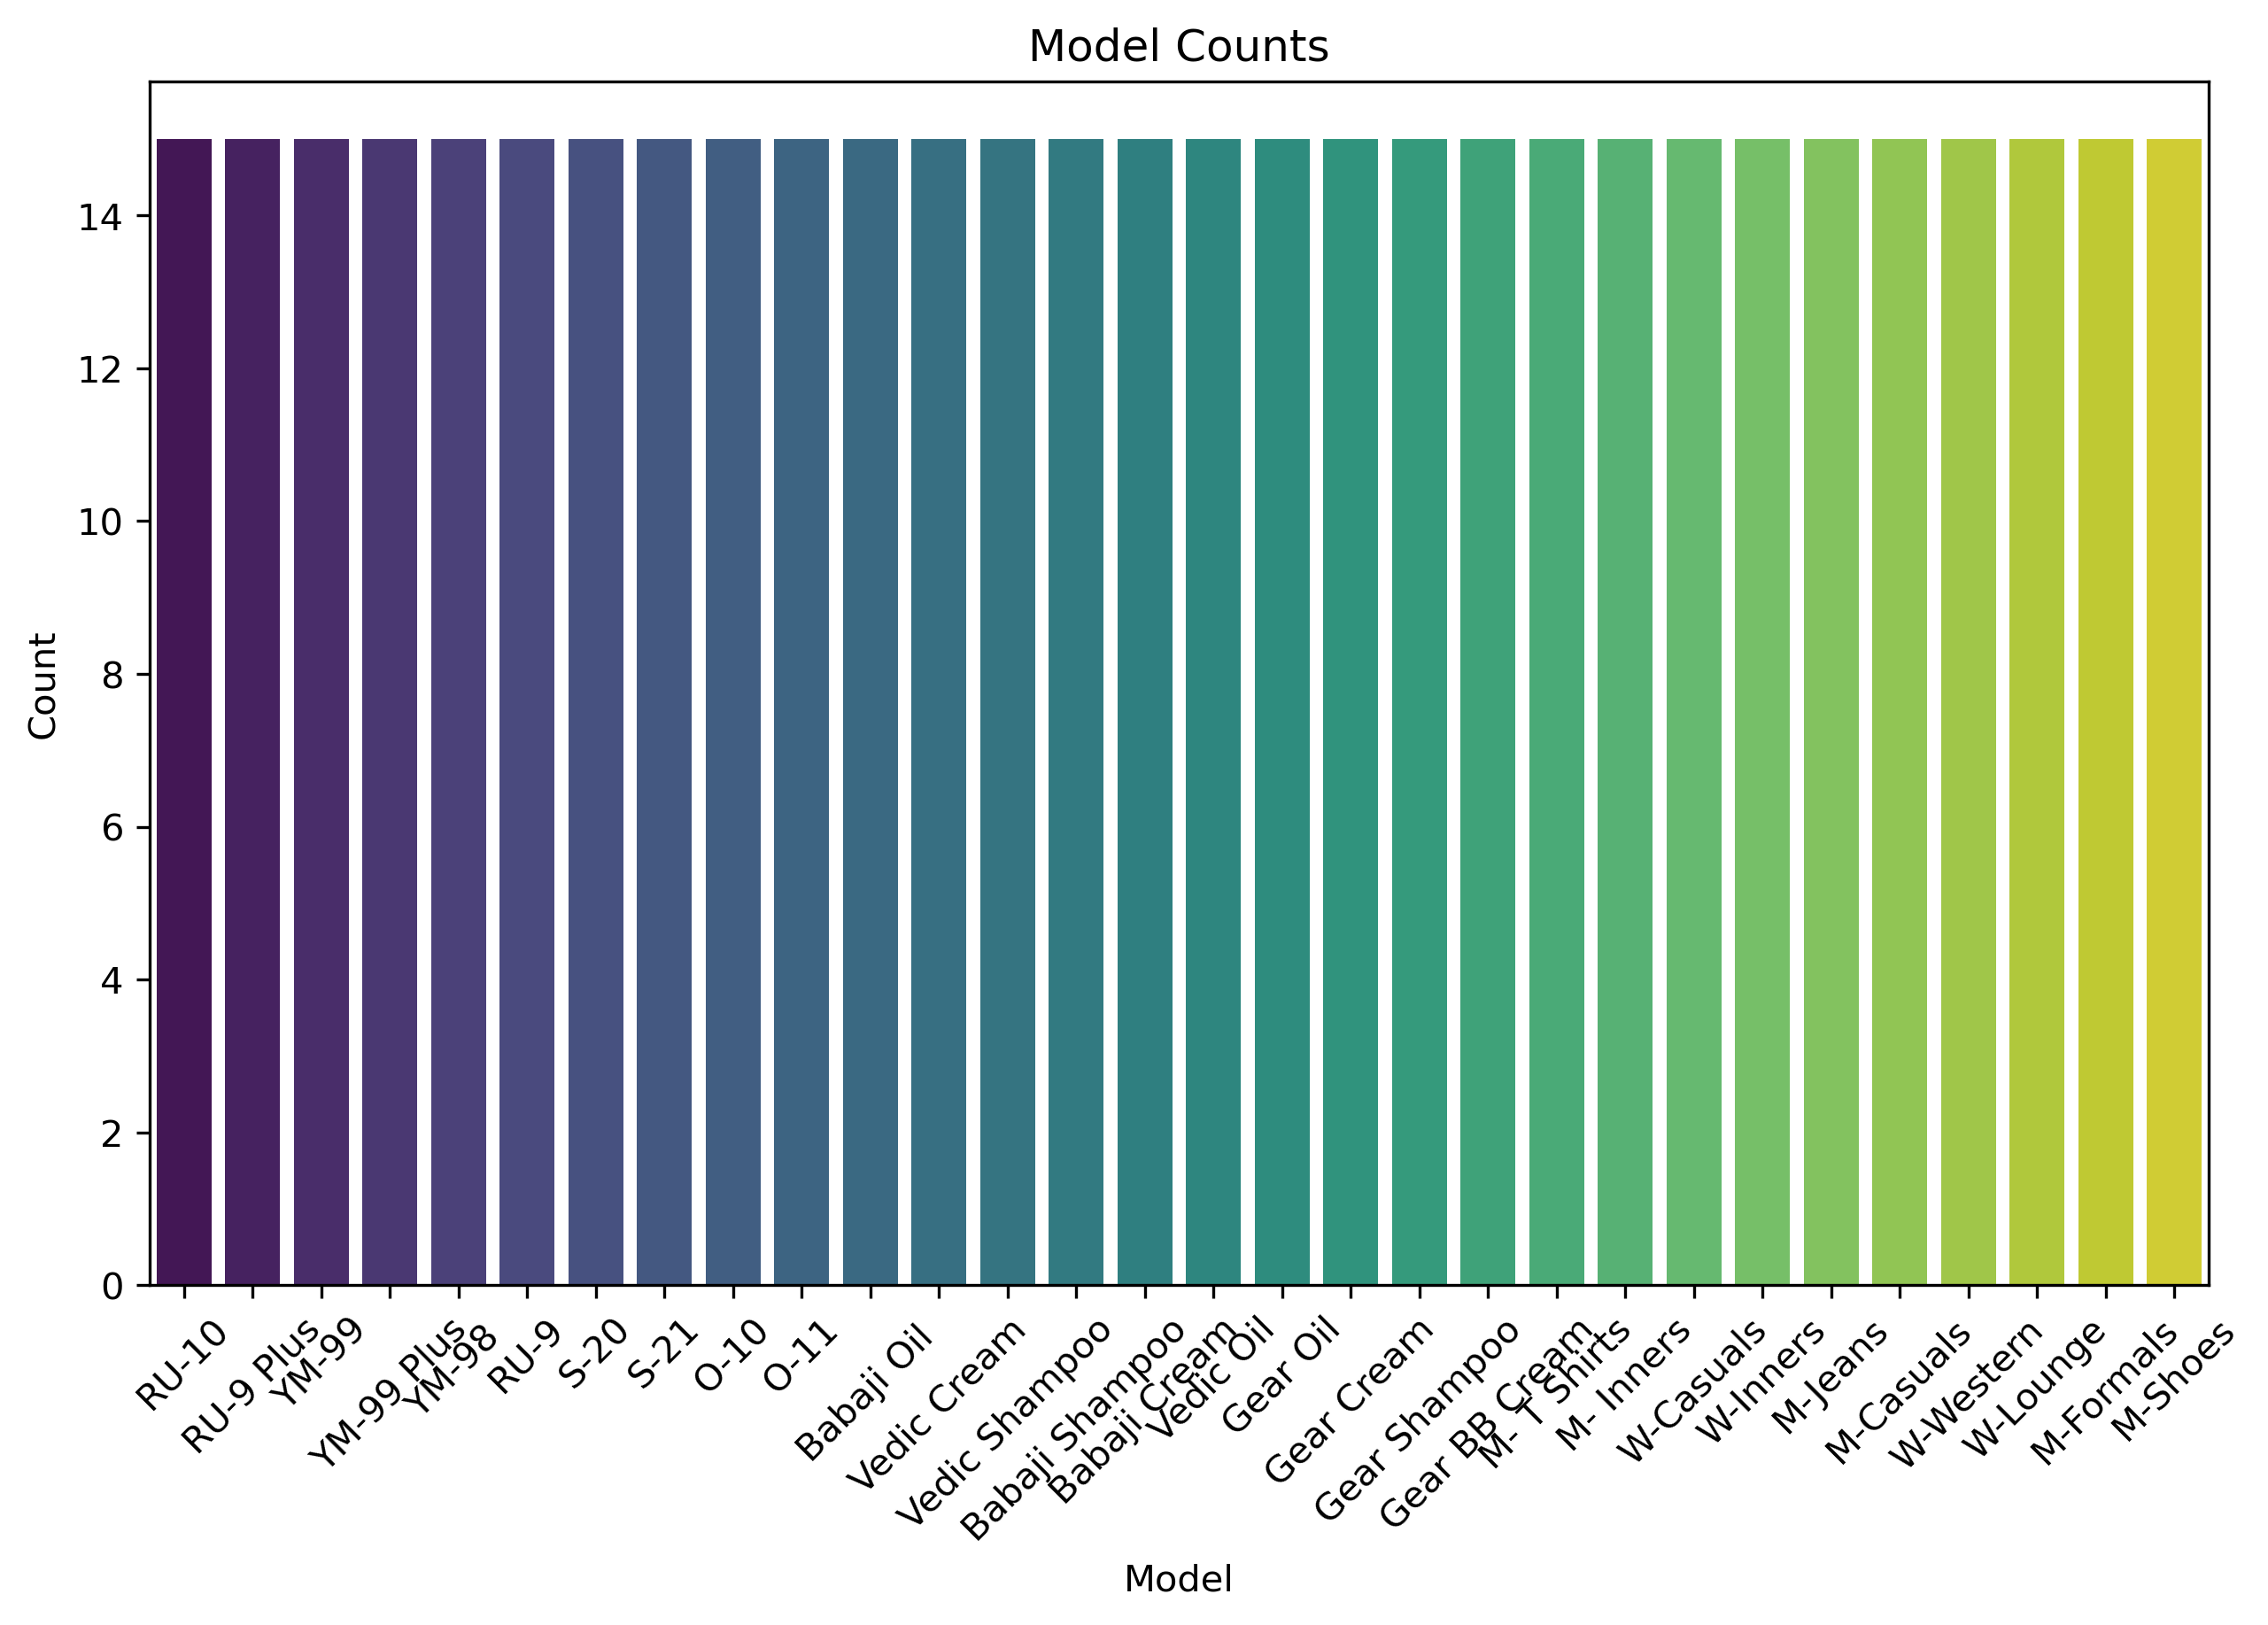

In [31]:
for col in categorical_cols:
    category_counts = df[col].value_counts()
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'{col} Counts')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
        

# Standardization of Numerical Variables

In [32]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [33]:
numerical_cols.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


In [34]:
standardised_data = df.copy()

In [35]:
for col in numerical_cols:
    mean= df[col].mean()
    std= df[col].std()
    standardised_data[col]= (df[col] - mean)/ std

In [36]:
standardised_data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.724706,Lifestyle,Jeera,M-Casuals,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,15-04-2021,Thursday,L07,C,0.220563,Lifestyle,Viva,W-Western,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,15-04-2021,Thursday,L08,C,-0.724706,Lifestyle,Viva,W-Lounge,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,15-04-2021,Thursday,L09,C,-0.488389,Lifestyle,Jeera,M-Formals,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


# Conversion of Categorical Data into Dummy Variables

In [37]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [38]:
numerical_cols.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


In [39]:
dummy_data = pd.get_dummies(df ,columns=categorical_cols.columns)

In [40]:
dummy_data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,6,2600,15600,17.057027,2660.896242,12939.103758,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,2,1600,3200,18.965550,606.897606,2593.102394,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,3,1900,5700,16.793014,957.201826,4742.798174,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
